# Motivation: why I'll never play the Lottery 

A few summers ago when the Power ball jack pot reached near 1-billion dollars my parents and everyone I knew brought a ticket. I didn’t because I knew my chances of winning where incredibly slim. As a mathematician I calculated the odds of winning with the choice $5$ of $69$ white balls and $1$ of $26$ red balls the chance of winning the entire jack pot 
$$\text{Probability of a winning ticket}  =\frac{\text{unique ticket number}}{\text{number of possible ticket combiations}}$$

$$ \frac{1}{\text{combinations of 5 regular balls} *\text{combinations of 1 power ball}}= $$

$$\frac{1}{{69 \choose 5} *{26 \choose 1}} = \frac{1}{292,201,338}. $$


I am not a person who likes to take risks and I’d rather spend few dollars on food or something that but this was a lot of money so I talked to my physics friends and without a lot of hard work we reasoned that if the weight of each of the balls was equivalent and with the numbers of balls in each chamber being really small the ability to predict the winning numbers was completely impossible. 


After the jackpot had been won. I wasn’t surprised that nobody that I knew didn’t win but I still thought about whether or not it was possible to win the lottery using mathematics. I took a cryptography class in my undergrad and at the end of a lecture my professor told the class that there were some people who sat at a bar and figured it out about 20 years ago. I guess that was at the back of my mind when I went to get carbonated water from a local gas station there I noticed that Quick draw wasn’t a physical drawing and that it was computer generated. I had once heard that computer can’t really make completely random sequences because the sequences created are algorithm based. So I thought what if I use a computer to find some pattern in previous numbers to predict the next sequence of numbers. And thus I started this small project.


In [56]:
%pylab inline
from collections import Counter
from operator import itemgetter

Populating the interactive namespace from numpy and matplotlib


# Frequency for a Given Month 

In additon to the quick draw lotto I also looked at Win4 which is also computer generated. First thinking about the odds of the game we must think about how the game is played. There are 20 number chosen from form 1-80 this means that the number of unique combinations of the numbers for quickdraw are


$${80\choose 20} = \frac{80!}{20!(80-20)!} = 3.5353161*10^{18}$$

this is about 3.5 trillion combinations. That alot of combinations but you only need to get 10 numbers correct to wint the jackpot of $100,000. The odd of you picking one corrct number is 20/80 continuing on the odds of you picking 10 correct numbers is 

$$\left(\frac{20}{80}\right)\left(\frac{19}{79}\right)\left(\frac{18}{78}\right)\left(\frac{17}{77}\right)\left(\frac{16}{76}\right)\left(\frac{15}{75}\right)\left(\frac{14}{74}\right)\left(\frac{13}{73}\right)\left(\frac{12}{72}\right)\left(\frac{11}{71}\right)\left(\frac{10}{70}\right) = \frac{17}{1,060,493,630}$$

For the Win4 game the odds are different 4 number are chosen out of 10 but the numbers can repeat in a sequence so the tnumber of possible winning numbers is  

$$10^4= 10,000$$
Which in all honest isn alot of possble numbers but the pay max payout for this lottery isn't that large it is only $5000


## Parsing the Data

These are some funtions that allow me to read and seprate numbers from a text file so that I can count angraph them.

In [57]:
def load_book(filename):
    fp = open(filename)#places "Numbers" in a file 
    res = fp.read()
    fp.close()
    return res #return what was read
def Punctuation(x):
    punctuation = '-'
    for char in punctuation: # removes Punctuation
        x  = x.replace(char,' ')
    return (x)
def number_counter(numbers):
    numbercount = {}# dictionary that holds all the words as keys
    for number in numbers:
        if number in numbercount:
            numbercount[number]+=1
        else:
            numbercount[number] = 1
    return numbercount
def get_count(x):
    return x[1]
def plot_bar(filename,scale):
    data = load_book(filename)
    data = Punctuation(data)
    numbers = data.split()
    numbers.sort()
    counter = number_counter(numbers);
    #sorted_words = sorted(counter.items(),key = get_count,reverse=True)
    #counts = [pair[1] for pair in sorted_words]
    
    figure(figsize=(20,5))
    
    c = list(Counter(numbers).items())
    #c.sort(key=itemgetter(1))
    labels, values = zip(*c)
    
    indexes = arange(len(labels))
    width = 0.8
    
    bar(indexes, values, width)
    xticks(indexes + width * 0.5, labels)
    
    #ticks = [width/2 + i for i in range(81)] 
    #bar(range(80), freqs, fc='c', ec='b') 
    #xticks(ticks, number) 
    ylim(0, scale) 
    title('QDdistro') 
    xlabel('Numbers') 
    ylabel('Frequency') 
    return show() 

## Pickin the first Number For Quick Draw

So first I'd like to see how to pick my first number for quick draw and I like to see if there are any biases toward a specific number that will allow me to chose the number with the most chances of being correct. Although as you can see below ploting the data

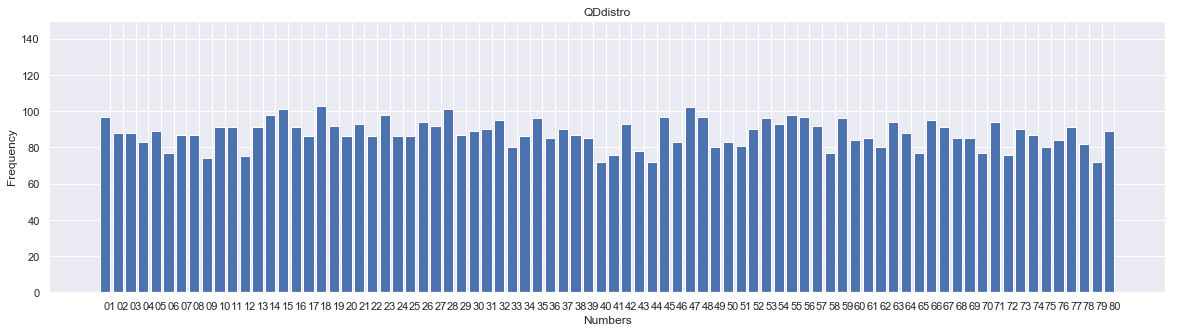

In [58]:
plot_bar("QuickDraw(120516).txt",150)

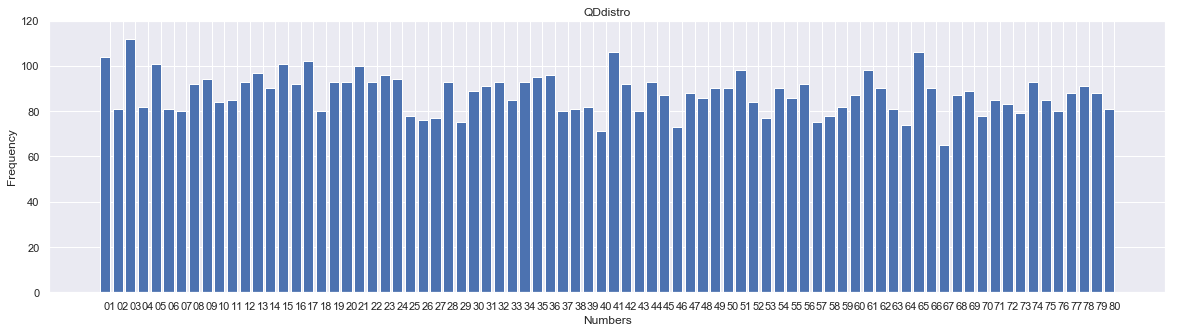

In [59]:
plot_bar("QuickDraw(120616).txt",120)

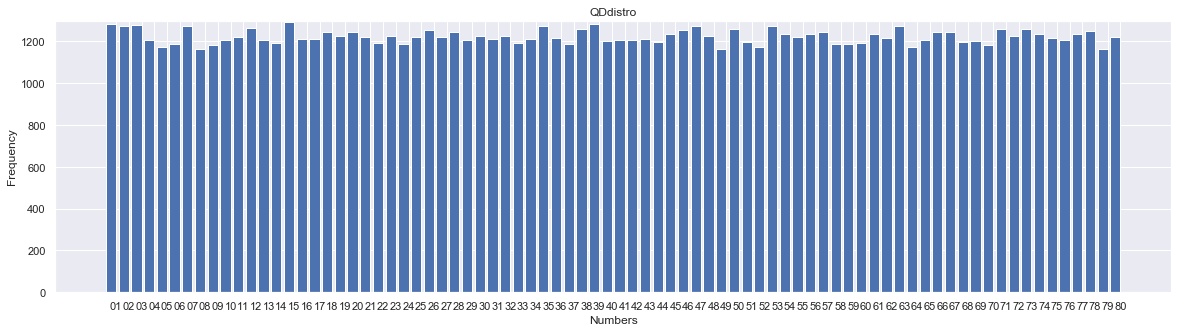

In [60]:
plot_bar("QuickDraw(dec).txt",1300)

# Freqency of a given Number over a month period

Coming Back to this porject after a few years I have a few new tricks to do some exploratory data analysis. One of those tricks comes in of the form of the following packages.

In [61]:
import pandas as pd
import seaborn as sns
sns.set()

In [62]:
#data = pd.read_csv("lotterydec2016")

One of things that I wanted to explore but could not a few years ago what the relationship between the freqency of the numbers since the numbers are computer generated the there must be an algorthim that makes sure that the distrubution of the the numbers remains undecernable. I figure that if one number has too large of a count then 